# Yahoo Finance API

In [1]:
from datetime import date
import matplotlib.pyplot as plt
import pandas as pd
import random
import seaborn as sns
import time
import yfinance as yf

In [2]:
today = date.today().strftime('%Y-%m-%d')

In [3]:
today

'2023-09-25'

In [5]:
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

In [6]:
sp500[0].head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [7]:
sp500[0].columns = [column.replace(' ','_').replace('-','_') for column in sp500[0].columns]

In [8]:
sp500[0]['GICS_Sector'].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Communication Services', 'Consumer Staples', 'Utilities',
       'Financials', 'Consumer Discretionary', 'Materials', 'Real Estate',
       'Energy'], dtype=object)

In [9]:
sp500[0]['GICS_Sub_Industry'].unique()

array(['Industrial Conglomerates', 'Building Products',
       'Health Care Equipment', 'Pharmaceuticals',
       'IT Consulting & Other Services', 'Interactive Home Entertainment',
       'Agricultural Products & Services', 'Application Software',
       'Human Resource & Employment Services',
       'Independent Power Producers & Energy Traders',
       'Life & Health Insurance', 'Hotels, Resorts & Cruise Lines',
       'Industrial Gases', 'Internet Services & Infrastructure',
       'Passenger Airlines', 'Specialty Chemicals', 'Office REITs',
       'Health Care Supplies', 'Electric Utilities',
       'Property & Casualty Insurance', 'Interactive Media & Services',
       'Tobacco', 'Broadline Retail',
       'Paper & Plastic Packaging Products & Materials', 'Semiconductors',
       'Multi-Utilities', 'Consumer Finance', 'Telecom Tower REITs',
       'Water Utilities', 'Asset Management & Custody Banks',
       'Electrical Components & Equipment', 'Biotechnology',
       'Electronic

In [10]:
def plot_stock_ticker(ticker: str, start_date: str, end_date: str):    
    # downloading the data of the ticker value between
    # the start and end dates
    df = yf.download(ticker, start_date, end_date)
    
    sns.lineplot(
        data=df,
        x=df.index,
        y='Adj Close'
    )
    sns.despine()
    plt.title(f"Adj Close Price - {ticker}")
    plt.show()

[*********************100%%**********************]  1 of 1 completed


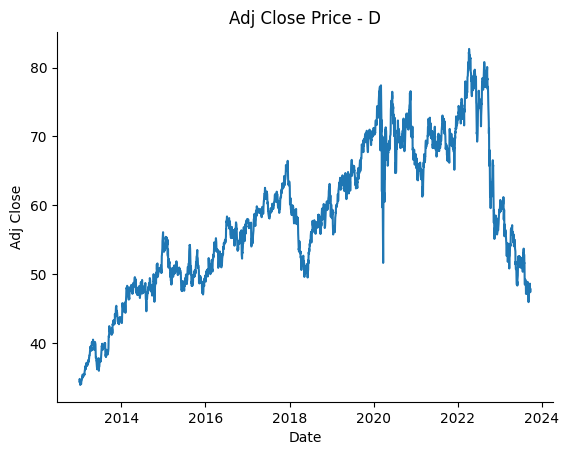

In [11]:
plot_stock_ticker('D','2013-01-01','2023-9-25')

In [ ]:
for symbol in random.sample(list(sp500[0].query("GICS_Sector == 'Information Technology'")['Symbol']), 10):
    plot_stock_ticker(symbol,'2013-01-01',date.today().strftime('%Y-%m-%d'))

In [ ]:
for symbol in sp500[0].query("GICS_Sector == 'Information Technology'")['Symbol']:
    plot_stock_ticker(symbol,'2013-01-01',date.today().strftime('%Y-%m-%d'))
    time.sleep(2)

[*********************100%%**********************]  1 of 1 completed


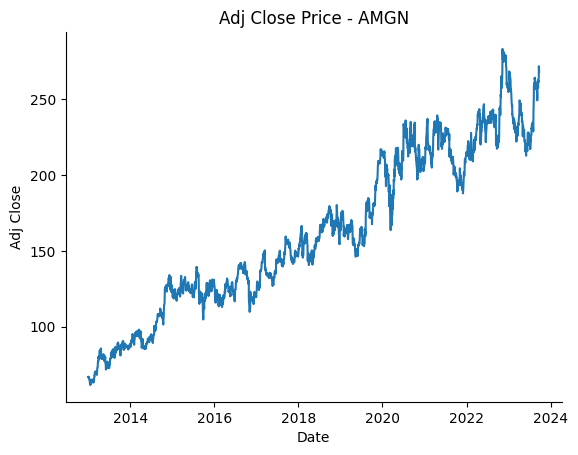

[*********************100%%**********************]  1 of 1 completed


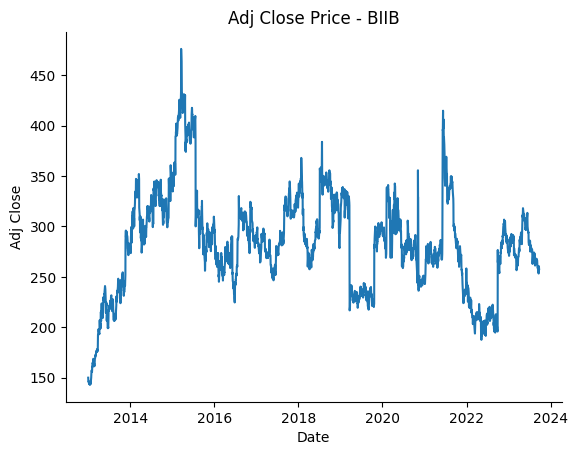

[*********************100%%**********************]  1 of 1 completed


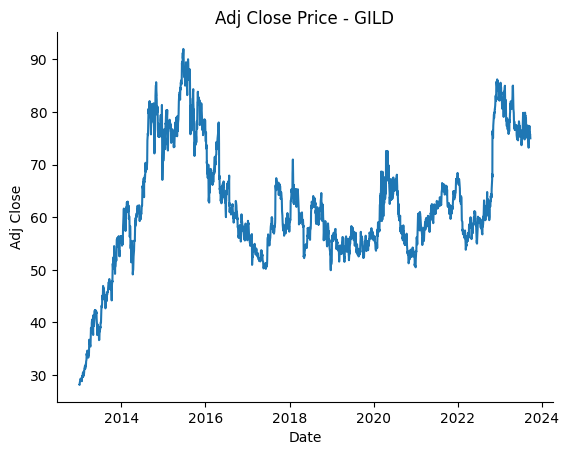

[*********************100%%**********************]  1 of 1 completed


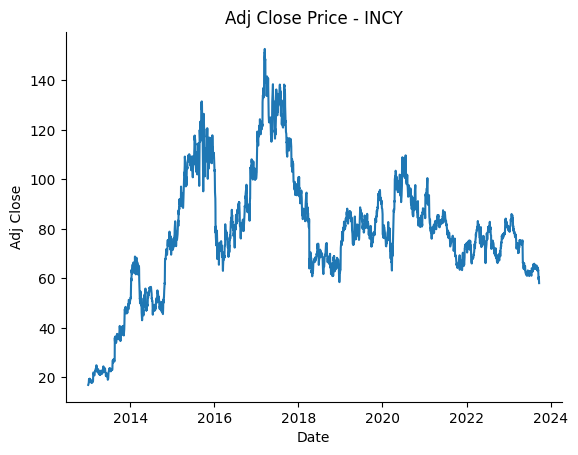

[*********************100%%**********************]  1 of 1 completed


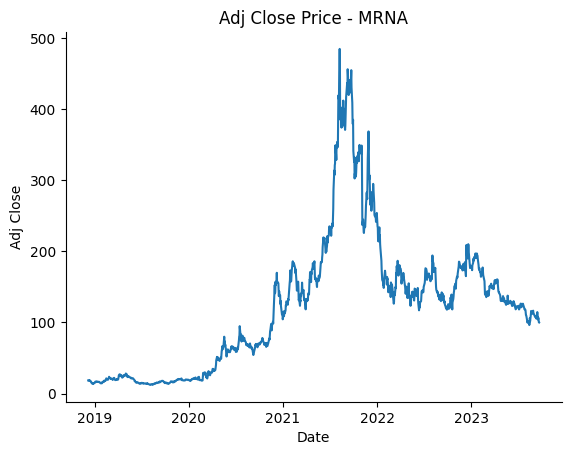

[*********************100%%**********************]  1 of 1 completed


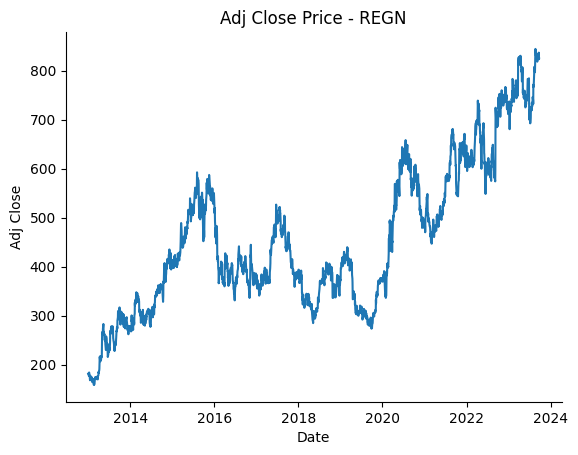

[*********************100%%**********************]  1 of 1 completed


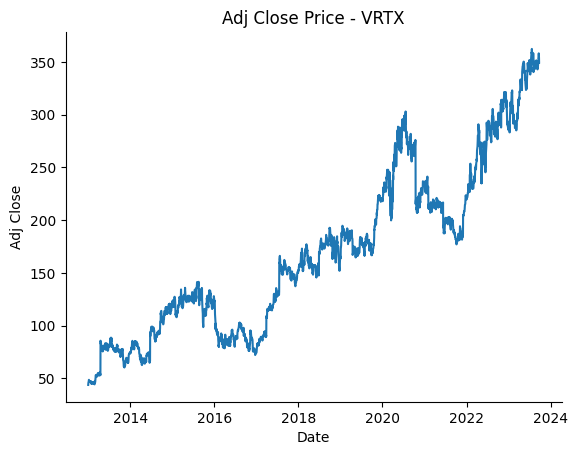

In [20]:
for symbol in sp500[0].query("GICS_Sub_Industry == 'Biotechnology'")['Symbol']:
    plot_stock_ticker(symbol,'2013-01-01',date.today().strftime('%Y-%m-%d'))
    time.sleep(2)

In [13]:
import panel as pn
pn.extension()

In [14]:
pane = pn.panel('<marquee>Here is some custom HTML</marquee>')

pane

Markdown(str)

In [19]:
sub_industry = pn.widgets.Select(name='Select', options=sorted(sp500[0]['GICS_Sub_Industry'].unique().tolist()))

sub_industry

Select(options=['Advertising', ...], value='Advertising')